In [2]:
try:
    import numpy as np; import scipy as sc; import matplotlib.pyplot as plt; import uncertainties; import pandas as pd
except ImportError:
    import sys
    !{sys.executable} -m pip install numpy scipy matplotlib pathlib uncertainties pandas
    print("Restart your kernel and try again")

## Importing Data

We will use the `xray.dat` file to look at some random xray data collected from a database. 

In [48]:
import numpy as np; import matplotlib.pyplot as plt
#Change the run to whatever run number you are on

fname = 'xray3601.dat'

# If you open the data as a random text file we see that the real data starts at line 2
data = np.loadtxt(fname, skiprows = 2) # Using skiprows allows us to skip the first two rows 
print(data)

[[3.00000000e+01 2.74695814e-01 2.10541397e-01]
 [3.17943592e+01 2.52507478e-01 1.77698180e-01]
 [3.36960373e+01 2.29885429e-01 1.50933087e-01]
 [3.57114601e+01 2.08661109e-01 1.28647909e-01]
 [3.78474312e+01 1.88787311e-01 1.11478753e-01]
 [4.01111603e+01 1.71800867e-01 9.50368643e-02]
 [4.25102806e+01 1.55344576e-01 8.09292868e-02]
 [4.50529022e+01 1.40007377e-01 6.89392835e-02]
 [4.77476006e+01 1.25937611e-01 5.84604815e-02]
 [5.06034737e+01 1.12534918e-01 4.94157784e-02]
 [5.36301651e+01 9.95348394e-02 4.24334817e-02]
 [5.68378868e+01 8.90907496e-02 3.67015153e-02]
 [6.02374725e+01 7.92772546e-02 3.15241478e-02]
 [6.38403854e+01 7.04302415e-02 2.71354113e-02]
 [6.76587982e+01 6.24897256e-02 2.32612584e-02]
 [7.17056046e+01 5.52954525e-02 1.97182391e-02]
 [7.59944458e+01 4.84313555e-02 1.63858943e-02]
 [8.05398178e+01 4.15830836e-02 1.35402465e-02]
 [8.53570633e+01 3.50219496e-02 1.13902492e-02]
 [9.04624252e+01 2.86002588e-02 9.70565714e-03]
 [9.58731613e+01 2.13203020e-02 8.325793

In [56]:
# Lets build some useful arrays from the header of this file 
headers = np.loadtxt(fname, delimiter=',', skiprows=1, max_rows= 1, dtype= object) #turns the second row into a array
title = np.loadtxt(fname, max_rows=1, dtype=object)[0] #Gets the string in the array

In [25]:
# An alternate way of looking at this data is though a pandas dataframe this gives a more nice looking data array

data1 = pd.DataFrame(data) #Loads the data into a dataframe
data1.columns = headers # turns array into a header for the dataframe

data1 

,Energy(eV),Delta,Beta
0,30.000000,0.274696,2.105414e-01
1,31.794359,0.252507,1.776982e-01
2,33.696037,0.229885,1.509331e-01
3,35.711460,0.208661,1.286479e-01
4,37.847431,0.188787,1.114788e-01
...,...,...,...
96,7926.563480,0.000011,1.753662e-07
97,8400.666020,0.000010,1.395859e-07
98,8903.125980,0.000009,1.110671e-07
99,9435.637700,0.000008,8.834859e-08


## Plotting

Moving onto our plotting we can do this either implictly or we can build figures. Documentation on this can be found though the [Matplotlib](https://matplotlib.org/) website. Since we want to use figures, we will use a more expicit method.

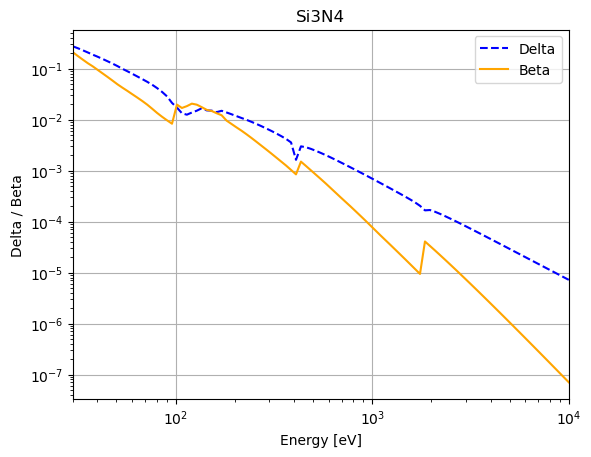

In [55]:
fig1, ax1 = plt.subplots()
ax1.loglog(data[:,0],data[:,1], 'b--')
ax1.loglog(data[:,0],data[:,2], 'orange')
ax1.set_xlim([np.amin(data[:,0]), np.amax(data[:,0])])

ax1.legend(['Delta','Beta'])
ax1.set_ylabel('Delta / Beta')
ax1.set_xlabel('Energy [eV]')
ax1.set_title(title)

ax1.grid()


Ignore Below this 

In [40]:
# import fabio
# img = fabio.open(edfpath)
# #print(img.header)
# 
# 
# plt.imshow(img.data)# Display as an image
# plt.title(str(img.header['title']))
# plt.xlim(400,800)
# plt.ylim(1050,800)
# plt.show()# Show GUI window
# 
# #I dont know how we can be qualetative here with the heatmaps and whatnot. 